<a href="https://colab.research.google.com/github/mahadrana054/Fraud-Detection-Model/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing data from Kaggle**

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter


file_path = "AIML Dataset.csv"
original = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "amanalisiddiqui/fraud-detection-dataset",
  file_path)

/tmp/ipython-input-1094123513.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  original = kagglehub.load_dataset(


Using Colab cache for faster access to the 'fraud-detection-dataset' dataset.


# **2. Analyzing the Data**

In [3]:
original.size

69988820

In [4]:
original.shape

(6362620, 11)

In [5]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
original.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df = original.sample(frac=0.4, random_state=42)

In [8]:

(original['isFraud'].value_counts(normalize=True) * 100).round(2)

,proportion
isFraud,
0,99.87
1,0.13


In [9]:
original['isFlaggedFraud'].value_counts() # This ratio is extremely small and not useful so we are going to drop it.

,count
isFlaggedFraud,
0,6362604
1,16


In [10]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


# **3. Visualization**

In [11]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3293159,252,CASH_IN,12618.82,C998022318,4373374.71,4385993.52,C1692722180,110056.70,97437.88,0,0
2450347,203,CASH_OUT,26329.25,C986388368,11179.00,0.00,C1150190295,4804912.23,4841167.91,0,0
377753,17,CASH_OUT,435499.51,C1102792071,11614.00,0.00,C1721637972,0.00,435499.51,0,0
5879507,403,CASH_IN,92961.31,C296069187,908797.00,1001758.31,C1827860758,2218357.40,2125396.09,0,0
5734838,399,TRANSFER,1484501.83,C1233447340,0.00,0.00,C697577636,12847702.73,14332204.56,0,0


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2276713466.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


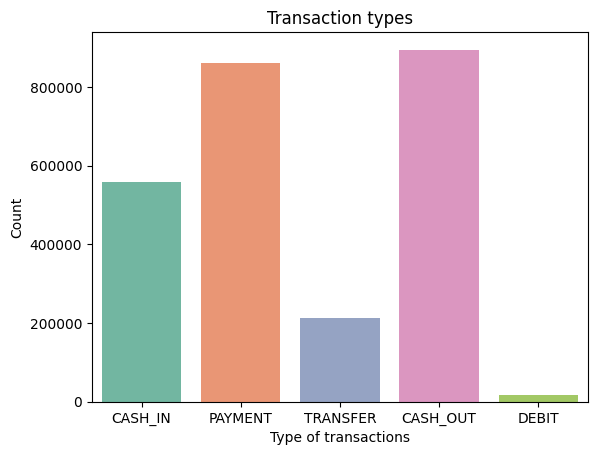

In [13]:
sns.countplot(data=df, x='type', palette='Set2')
plt.xlabel('Type of transactions')
plt.ylabel('Count')
plt.title('Transaction types')
plt.show()

In [14]:
df = original.sample(frac=0.3,random_state=42) # I take sample of data because it takes so much time for execution on google colab.

In [15]:
fraud_by_type = df.groupby('type')['isFraud'].mean()

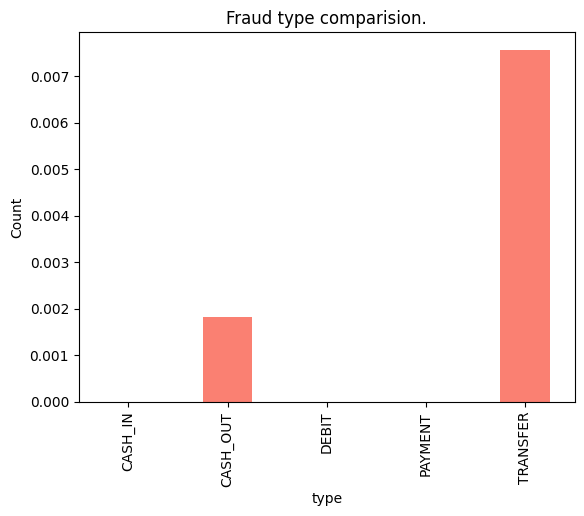

In [16]:
fraud_by_type.plot(kind='bar', title='Fraud type comparision.', color='salmon')
plt.ylabel('Count')
plt.show()

In [17]:
df['amount'].describe().astype(int)

,amount
count,1908786
mean,179972
std,607313
min,0
25%,13377
50%,74835
75%,208812
max,69337316


<function matplotlib.pyplot.show(close=None, block=None)>

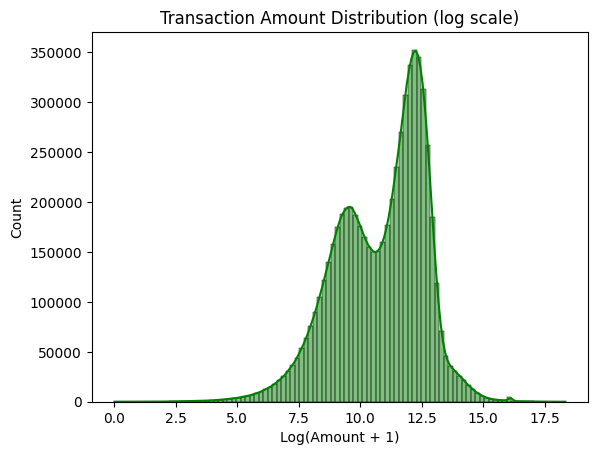

In [18]:
sns.histplot(np.log1p(original['amount']), kde=True, bins=100, color='green')
plt.title('Transaction Amount Distribution (log scale)')
plt.xlabel('Log(Amount + 1)')
plt.show

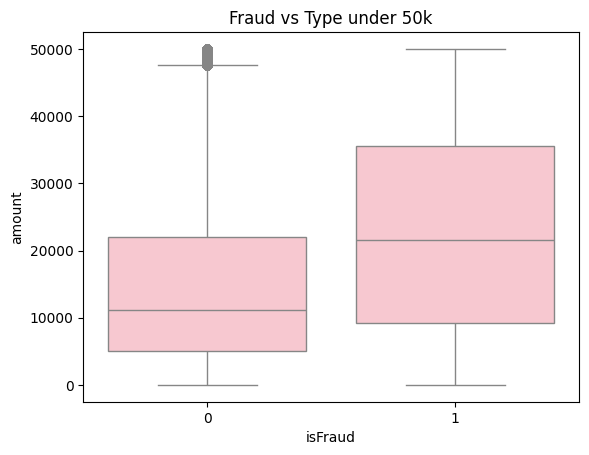

In [19]:
sns.boxplot(data=original[original['amount'] < 50000], y='amount', x='isFraud', color='pink')
plt.title('Fraud vs Type under 50k')
plt.show()

In [20]:
high_value_percent = (original['amount'] > 50000).mean() * 100
print(f"{high_value_percent:.2f}% of data is above 50k")

55.90% of data is above 50k


In [21]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [22]:
original['diffBalanceOrg'] = original['oldbalanceOrg'] - original['newbalanceOrig']
original['diffBalanceDest'] = original['newbalanceDest'] - original['oldbalanceDest']

In [23]:
(original['diffBalanceOrg'] < 0).sum()


np.int64(1399253)

In [24]:
(original['diffBalanceDest'] < 0).sum()

np.int64(1238864)

In [25]:
df.drop(columns=['step'], inplace=True) # This column has not relation with any column

In [26]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [27]:
top_senders = original['nameOrig'].value_counts().head()
top_recievers = original['nameDest'].value_counts().head()

In [28]:
top_senders

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3


In [29]:
top_recievers

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101


In [30]:
fraud_victims = df[df['isFraud']==1]['nameDest'].value_counts().head(10)

In [31]:
fraud_accounts = df[df['isFraud']==1]['nameOrig'].value_counts().head(10)

In [32]:
fraud_accounts

,count
nameOrig,
C13539331,1
C1773649560,1
C747251675,1
C248395903,1
C314117712,1
C2114580288,1
C1271945104,1
C1340873625,1
C2081856005,1


In [33]:
fraud_victims

,count
nameDest,
C686334805,2
C1653587362,2
C1981613973,2
C1656842502,2
C644163395,2
C650699445,2
C252274322,1
C278197109,1
C180492809,1


In [34]:
fraud_by_types = original[original['type'].isin(['TRANSFER', 'CASH_OUT'])]

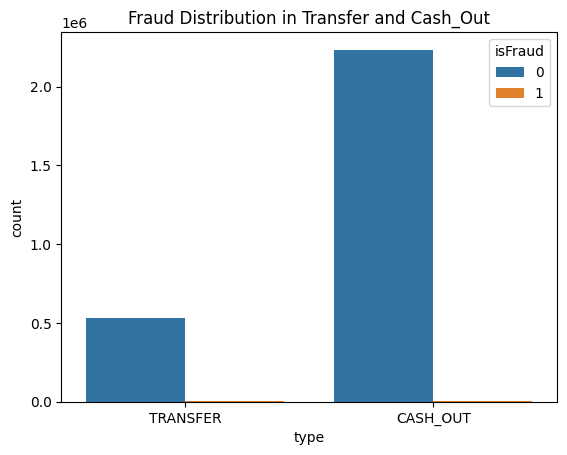

In [35]:
sns.countplot(data=fraud_by_types, hue='isFraud', x='type')
plt.title('Fraud Distribution in Transfer and Cash_Out')
plt.show()

In [36]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [37]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest', 'isFraud', 'isFlaggedFraud']].corr()

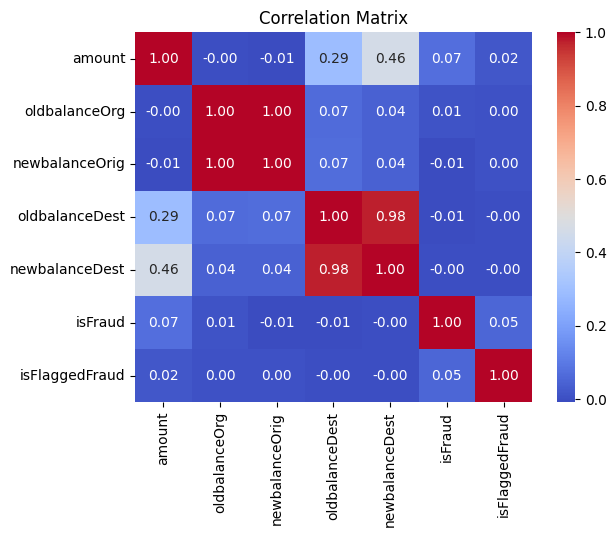

In [38]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [39]:
zero_after_transfer = original[
    (original['oldbalanceOrg'] > 0) &
    (original['newbalanceOrig'] == 0) &
    (original['type'].isin(['TRANSFER', 'CASH_OUT']))
]

In [40]:
((zero_after_transfer['isFraud'].value_counts(normalize=True))) * 100

,proportion
isFraud,
0,99.325631
1,0.674369


# **4. Feature Engineering and Model Training**

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [52]:
df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrg,diffBalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [47]:
df = original.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [53]:
numeric = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical = ['type']

In [54]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [55]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(), categorical)
    ]
)

In [59]:
pipeline = Pipeline([
    ('processing', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [60]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [63]:
y_pred = pipeline.predict(x_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1588610
           1       0.02      0.93      0.04      2045

    accuracy                           0.95   1590655
   macro avg       0.51      0.94      0.51   1590655
weighted avg       1.00      0.95      0.97   1590655



In [76]:
cm = confusion_matrix(y_test, y_pred)

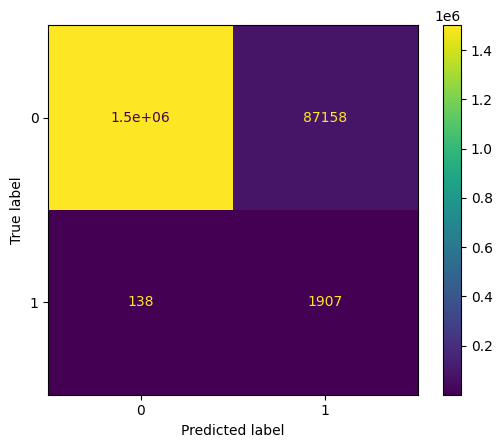

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [73]:
pipeline.score(x_test, y_test)

0.9451194633657204

In [81]:
confusion_matrix(y_test,y_pred)

array([[1501452,   87158],
       [    138,    1907]])

In [93]:
from xgboost import XGBClassifier
ratio = (len(y_train) - sum(y_train)) / sum(y_train)

In [95]:
pipeline = Pipeline([
    ('processing', preprocessor),
    ('clf', XGBClassifier(
    scale_pos_weight=ratio,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
))
])

In [97]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [98]:
y_pred = pipeline.predict(x_test)

In [99]:
print(classification_report(y_test, y_pred)) # clearly improved from previos report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.25      1.00      0.40      2045

    accuracy                           1.00   1590655
   macro avg       0.62      1.00      0.70   1590655
weighted avg       1.00      1.00      1.00   1590655



In [100]:
cm = confusion_matrix(y_test, y_pred)

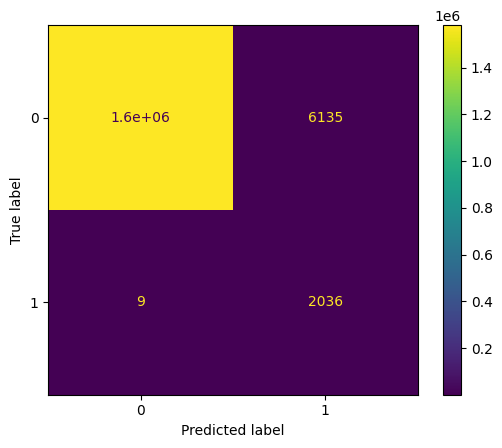

In [101]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [102]:
confusion_matrix(y_test, y_pred)

array([[1582475,    6135],
       [      9,    2036]])

In [104]:
(pipeline.score(x_test, y_test)) * 100

99.61374402368835

In [105]:
import joblib
joblib.dump(pipeline, 'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']